# Multiples gráficas

**A veces resulta útil comparar diferentes vistas de datos una al lado de la otra.**
Para este fin, Matplotlib tiene el concepto de *subplots*: grupos de ejes más pequeños que pueden existir juntos dentro de una sola figura.
Estos *subplots* pueden ser inserciones, cuadrículas de gráficas u otros diseños más complicados.
En esta sección exploraremos cuatro rutinas para crear *subplots* en Matplotlib.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
import numpy as np

## ``plt.axes``: *Subplots* a mano

El método más básico para crear ejes es utilizar la función ``plt.axes``.
Como hemos visto anteriormente, de forma predeterminada esto crea un objeto de ejes estándar que llena toda la figura.
``plt.axes`` también toma un argumento opcional que es una lista de cuatro números en el sistema de coordenadas de la figura.
Estos números representan ``[izquierda, abajo, ancho, alto]`` en el sistema de coordenadas de la figura, que varía desde 0 en la parte inferior izquierda de la figura hasta 1 en la parte superior derecha de la figura.

Por ejemplo, podríamos crear ejes insertados en la esquina superior derecha de otros ejes estableciendo la posición *x* e *y* en 0.65 (es decir, comenzando en el 65% del ancho y el 65% de la altura del eje de la figura) y las extensiones *x* e *y* a 0.2 (es decir, el tamaño de los ejes es el 20% del ancho y el 20% de la altura de la figura):

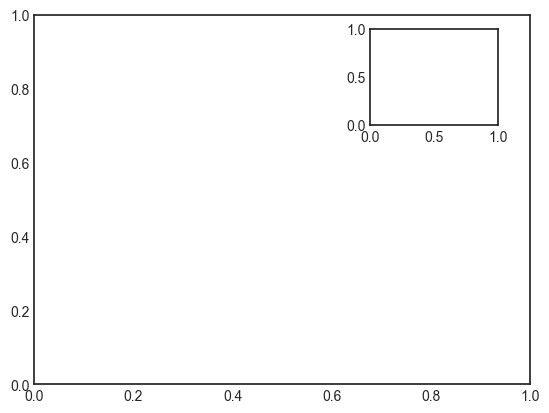

In [5]:
ax1 = plt.axes()  # ejes estandar
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) # [originX, originY, widht, height]

El equivalente de este comando dentro de la interfaz orientada a objetos es ``fig.add_axes()``. Usemos esto para crear dos ejes apilados verticalmente:

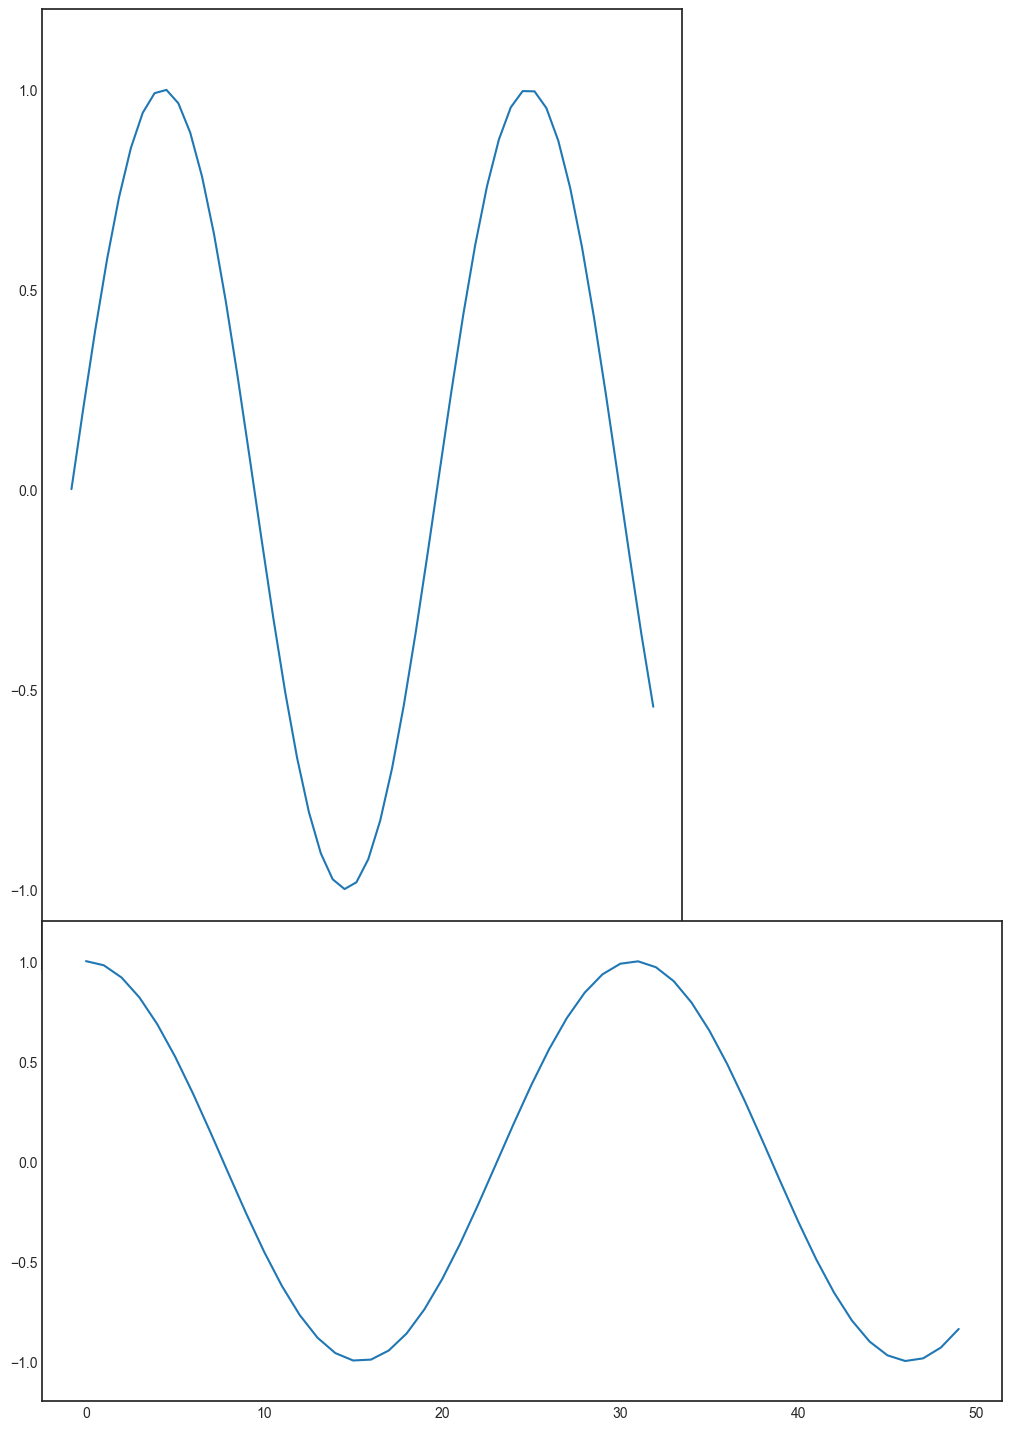

In [9]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 1, 1, 2],
                   xticklabels=[], ylim=(-1.2, 1.2))
# xticklabels=[] es para que no aparezca informacion
# en el eje x
ax2 = fig.add_axes([0.1, 0.1, 1.5, 1],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

Ahora tenemos dos ejes (el superior sin etiquetas de marca) que simplemente se tocan: la parte inferior del panel superior (en la posición 0.5) coincide con la parte superior del panel inferior (en la posición 0.1 + 0.4).

## ``plt.subplot``: cuadriculas sencillas de *Subplots*

Las columnas o filas de *subplots* alineadas son una necesidad bastante común, por lo que Matplotlib tiene varias rutinas convenientes que las hacen fáciles de crear.
El nivel más bajo de ellos es ``plt.subplot()``, que crea un único *subplot* dentro de una cuadrícula.
Como puede ver, este comando toma tres argumentos enteros: el número de filas, el número de columnas y el índice del gráfico que se creará en este esquema, que va desde la parte superior izquierda hasta la parte inferior derecha:

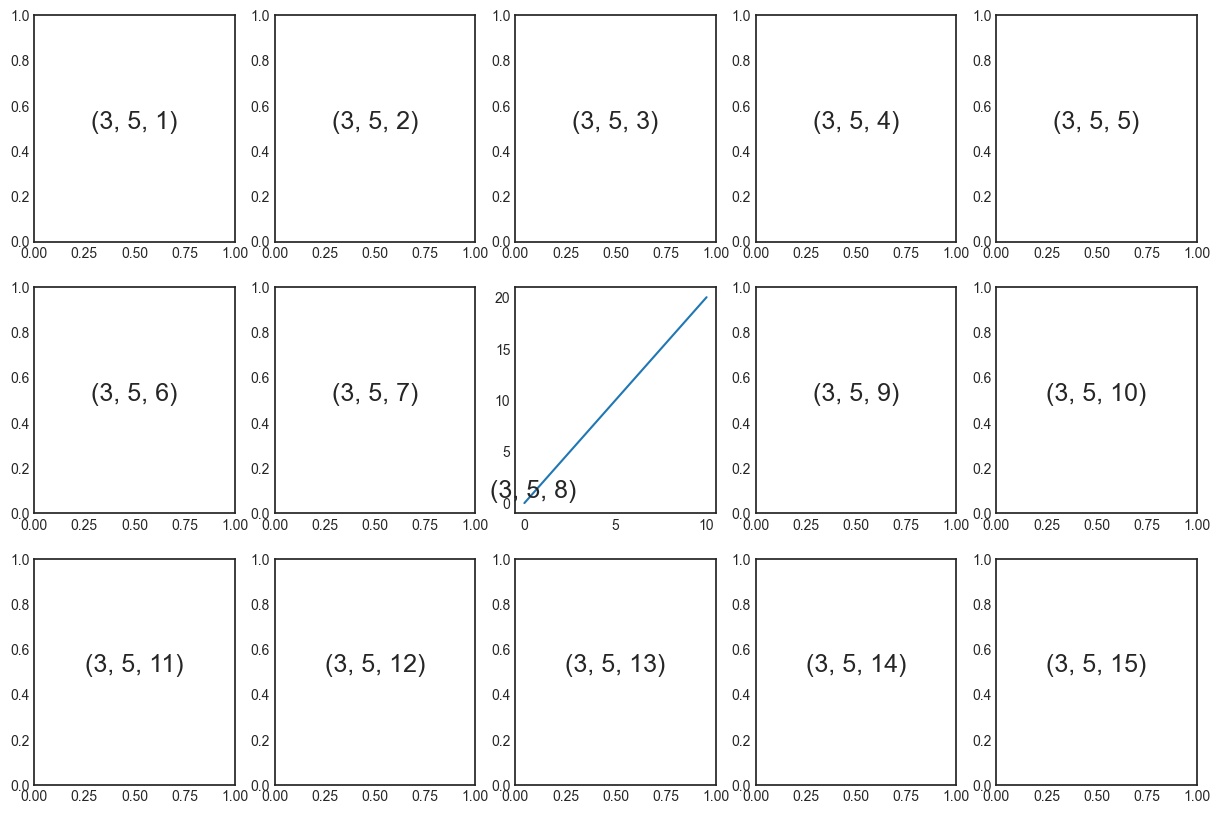

In [13]:
plt.figure(figsize=(15,10))
for i in range(1, 16):
    plt.subplot(3, 5, i) # filas, columnas, posición
    if i == 8:
         plt.plot(x, 2*x)
    plt.text(0.5, 0.5, str((3, 5, i)),
             fontsize=18, ha='center')

El comando ``plt.subplots_adjust`` se puede utilizar para ajustar el espacio entre estos gráficos.
El siguiente código utiliza el comando orientado a objetos equivalente, ``fig.add_subplot()``:

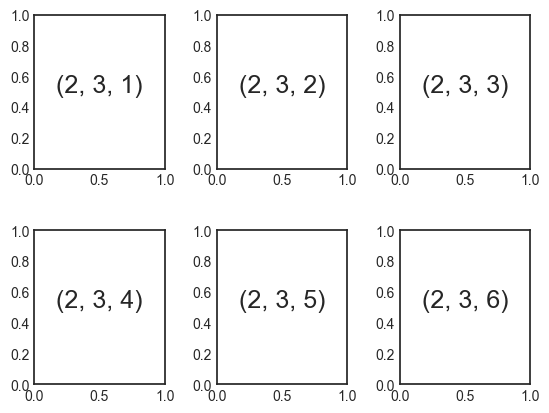

In [14]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Hemos utilizado los argumentos ``hspace`` y ``wspace`` de ``plt.subplots_adjust``, que especifican el **espaciado a lo largo de la altura y el ancho de la figura**, en unidades del tamaño del *subplot* ( en este caso, el espacio es el 40% del ancho y alto del *subplot*).

## ``plt.subplots``: toda la 'red'-'malla' de una sola vez

**El enfoque que acabamos de describir puede resultar bastante tedioso al crear una gran cuadrícula de *subplots*, especialmente si desea ocultar las etiquetas de los ejes x e y en las gráficas internas.**
Para este propósito, ``plt.subplots()`` es la herramienta más fácil de usar (tenga en cuenta la ``s`` al final de ``subplots``). En lugar de crear un único *subplot*, esta función crea una cuadrícula ('red'-'malla') completa de *subplots* en una sola línea y las devuelve en una matriz NumPy.
Los argumentos son el número de filas y el número de columnas, junto con las palabras clave opcionales ``sharex`` y ``sharey``, que le permiten especificar las relaciones entre diferentes ejes.

Aquí crearemos una cuadrícula de *subplots* $2 \times 3$, donde todos los ejes en la misma fila comparten su escala del eje y, y todos los ejes en la misma columna comparten su escala del eje x:

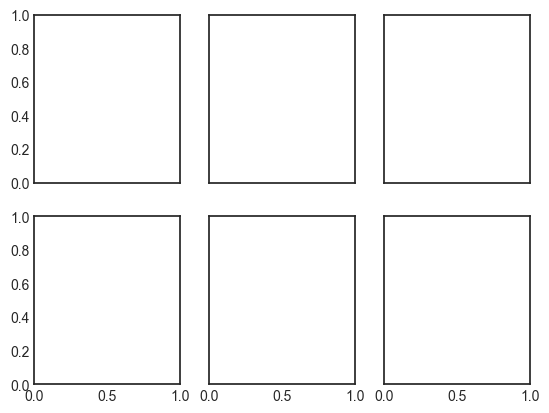

In [15]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Tenga en cuenta que al especificar ``sharex`` y ``sharey``, eliminamos automáticamente las etiquetas internas de la cuadrícula ('red'-'malla') para que el gráfico sea más limpio.
La cuadrícula ('red'-'malla') resultante de instancias de ejes se devuelve dentro de una matriz NumPy, lo que permite una especificación conveniente de los ejes deseados utilizando la notación de indexación de matrices estándar:

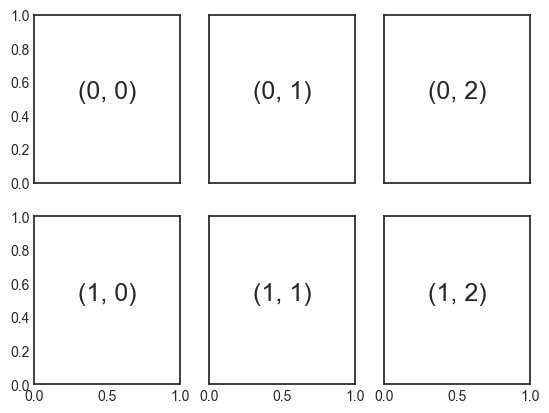

In [16]:
# axes están en un array bidimensional, indexados por
# [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

En comparación con ``plt.subplot()``, ``plt.subplots()`` es más consistente con la indexación convencional basada en 0 de Python.

## ``plt.GridSpec``: organización más complicada

Para ir más allá de una cuadrícula ('red'-'malla') normal y abarcar *subplots* que abarcan varias filas y columnas, ``plt.GridSpec()`` es la mejor herramienta.
El objeto ``plt.GridSpec()`` no crea un gráfico por sí solo; es simplemente una interfaz conveniente que se reconoce mediante el comando ``plt.subplot()``.
Por ejemplo, una especificación de cuadrícula ('red'-'malla') para una cuadrícula ('red'-'malla') de dos filas y tres columnas con un espacio de ancho y alto especificado se ve así:

In [17]:
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.3)

A partir de esto podemos especificar ubicaciones y extensiones de *subplots* usando la familiar sintaxis de intervalos de Python:

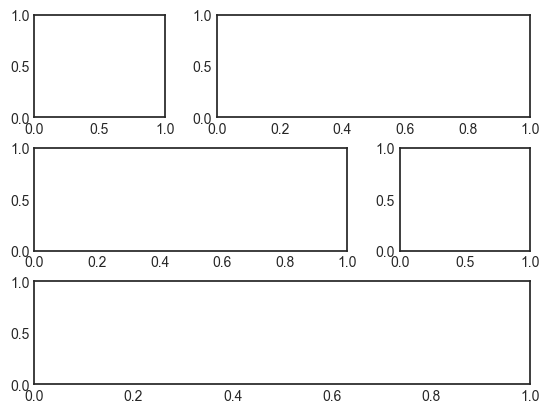

In [18]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);
plt.subplot(grid[2, :]);

Este tipo de alineación de cuadrícula ('red'-'malla') flexible tiene una amplia gama de usos.
Lo uso con mayor frecuencia cuando creo gráficos de histogramas de ejes múltiples como los que se muestran aquí:

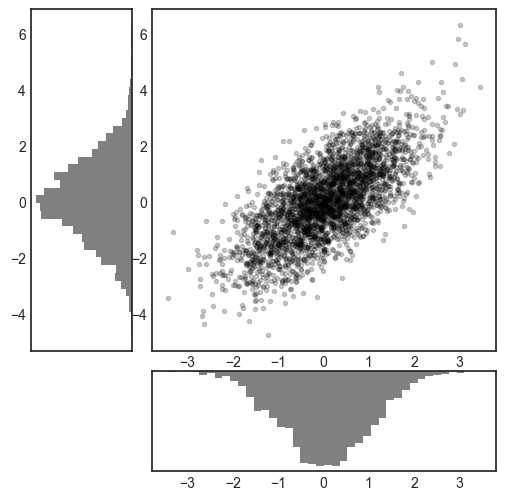

In [19]:
# Crea un conjunto de datos con una distribución normal.
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Configurar los ejes con gridspec.
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# Puntos de dispersión en los ejes principales.
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# Histograma en los ejes adjuntos.
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

Este tipo de distribución representada junto a sus márgenes es lo suficientemente común como para tener su propia API de trazado en el paquete Seaborn; consulte [Visualización con Seaborn](https://seaborn.pydata.org/examples/index.html) para obtener más detalles.